# Pokemon Card Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from utilities import *

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/raw_pokemon_data.csv')

# Overview

- This project came into being from my son's love for Pokemon the last couple of years. I had no previous knowledge of Pokemon before other than knowing a few of the main characters and knowing that it was a cartoon and game

- He's been trading cards a lot this year and that started getting me interested in what makes cards valuable
  - Some have been sold for > $100k
  - He was trading some that were priced $100-200 
  
- They are valued by collectors and players building their decks

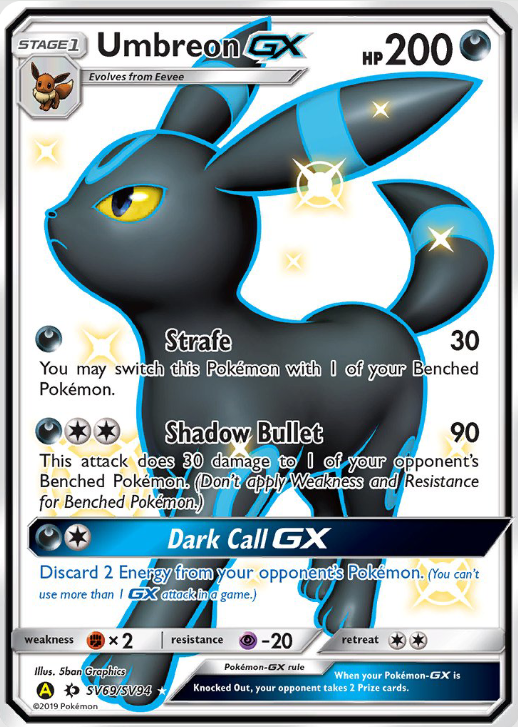 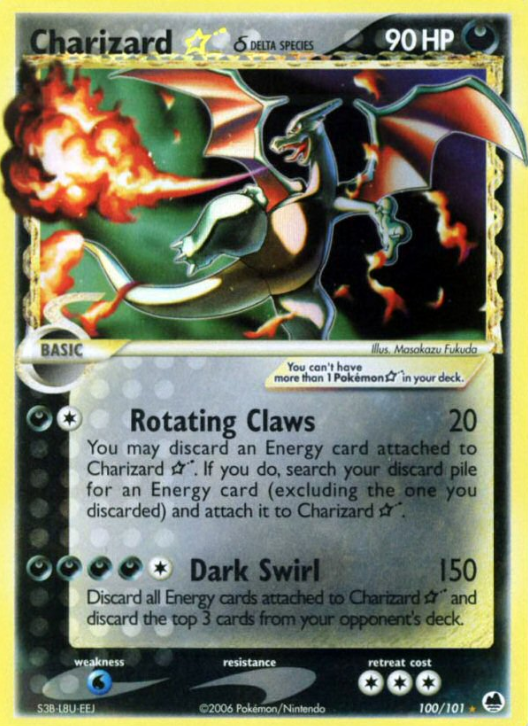

# Main Questions

These were some of the main questions that drove me to do this analysis

- What drives the value of Pokemon cards?
- What are the main characteristics of the trading cards?
- How can I educate my son in determining value for his cards?
  - Are things features that he focuses on actually valuable or not?

# About the Data

The data comes from here: 
- https://docs.pokemontcg.io/ 

Using the SDK found here: https://github.com/PokemonTCG/pokemon-tcg-sdk-python/tree/master/pokemontcgsdk

The get_data.py pulls the data using the pokemon-tcg-sdk, does some light transformation and combines into a single dataframe saving the file as raw_pokemon_data.csv in the data folder. 

Pokemon cards have card ids that can have several different types, which in this case is picked up by the price_type column. I created a card_type_id column which has a single card_id and price type combination for the id. 

The pricing data is pulled through the SDK mentioned above from TCG Player which seems to be one of the main pricing sources for Pokemon cards. They have an API but are not issuing new API keys at this time. 
  - https://developer.tcgplayer.com/

Some possible limitations to our data and approach include:

- Does not account for card quality or grading
- Does not account for volume in production of each card
- Price data is for a single day
  - We do not have volume of transactions
- This also does not account for the cost and effort that would be required to realize any gains from these cards if that was the intent. 

In [4]:
df.head(4)

,card_type_id,name,hp,rarity,artist,supertype,evolvesFrom,flavorText,convertedRetreatCost,regulationMark,rules,image_small,image_large,set_id,set_name,set_series,set_printedTotal,set_total,set_releaseDate,set_updatedAt,set_legalities_unlimited,set_legalities_expanded,set_legalities_standard,set_image_symbol,set_image_logo,number,ancientTrait_name,ancientTrait_text,type_1,type_2,subtype_1,subtype_2,subtype_3,subtype_4,nationalPokedexNumber,num_abilities,num_attacks,num_resistances,num_weaknesses,price_type,low,mid,high,market,directLow
0,hgss4-1_holofoil,Aggron,140.0,Rare Holo,Kagemaru Himeno,Pokémon,Lairon,You can tell its age by the length of its iron...,4.0,NaN,NaN,https://images.pokemontcg.io/hgss4/1.png,https://images.pokemontcg.io/hgss4/1_hires.png,hgss4,HS—Triumphant,HeartGold & SoulSilver,102,103,2010/11/03,2018/03/04 10:35:00,Legal,NaN,NaN,https://images.pokemontcg.io/hgss4/symbol.png,https://images.pokemontcg.io/hgss4/logo.png,1,NaN,NaN,Metal,NaN,Stage 2,NaN,NaN,NaN,306.0,NaN,2.0,1.0,1.0,holofoil,1.69,3.14,4.49,2.59,3.90
1,hgss4-1_reverseHolofoil,Aggron,140.0,Rare Holo,Kagemaru Himeno,Pokémon,Lairon,You can tell its age by the length of its iron...,4.0,NaN,NaN,https://images.pokemontcg.io/hgss4/1.png,https://images.pokemontcg.io/hgss4/1_hires.png,hgss4,HS—Triumphant,HeartGold & SoulSilver,102,103,2010/11/03,2018/03/04 10:35:00,Legal,NaN,NaN,https://images.pokemontcg.io/hgss4/symbol.png,https://images.pokemontcg.io/hgss4/logo.png,1,NaN,NaN,Metal,NaN,Stage 2,NaN,NaN,NaN,306.0,NaN,2.0,1.0,1.0,reverseHolofoil,1.99,2.40,4.80,2.40,3.07
2,xy5-1_normal,Weedle,50.0,Common,Midori Harada,Pokémon,NaN,Its poison stinger is very powerful. Its brigh...,1.0,NaN,NaN,https://images.pokemontcg.io/xy5/1.png,https://images.pokemontcg.io/xy5/1_hires.png,xy5,Primal Clash,XY,160,164,2015/02/04,2020/05/01 16:06:00,Legal,Legal,NaN,https://images.pokemontcg.io/xy5/symbol.png,https://images.pokemontcg.io/xy5/logo.png,1,NaN,NaN,Grass,NaN,Basic,NaN,NaN,NaN,13.0,NaN,1.0,NaN,1.0,normal,0.01,0.16,2.00,0.12,NaN
3,xy5-1_reverseHolofoil,Weedle,50.0,Common,Midori Harada,Pokémon,NaN,Its poison stinger is very powerful. Its brigh...,1.0,NaN,NaN,https://images.pokemontcg.io/xy5/1.png,https://images.pokemontcg.io/xy5/1_hires.png,xy5,Primal Clash,XY,160,164,2015/02/04,2020/05/01 16:06:00,Legal,Legal,NaN,https://images.pokemontcg.io/xy5/symbol.png,https://images.pokemontcg.io/xy5/logo.png,1,NaN,NaN,Grass,NaN,Basic,NaN,NaN,NaN,13.0,NaN,1.0,NaN,1.0,reverseHolofoil,0.25,0.43,16.53,0.45,1.00


Data Definitions

| Column                     | Description                                                    |
|----------------------------|----------------------------------------------------------------|
| card_type_id               | Unique identifier for each card created using card_id and price_type |
| name                       | Name of the card                                               |
| hp                         | Hit points of the card                                         |
| rarity                     | Rarity of the card (e.g., common, rare)                        |
| artist                     | Name of the artist who illustrated the card                    |
| supertype                  | Supertype of the card (Pokemon, Trainer, Energy)               |
| evolvesFrom                | Name of the card this pokemon evolves from                     |
| flavorText                 | Text describing the card different features on card            |
| convertedRetreatCost       | Converted retreat cost in the game                             |
| regulationMark             | Regulation mark for tournament legality                        |
| rules                      | Rules text providing gameplay information                      |
| image_small                | URL of the small image of the card                             |
| image_large                | URL of the large image of the card                             |
| set_id                     | Unique identifier for the set the card belongs to              |
| set_name                   | Name of the set the card belongs to                            |
| set_series                 | Series of the set the card belongs to                          |
| set_printedTotal           | Original number of printed cards in the set                    |

| Column                     | Description                                                    |
|----------------------------|----------------------------------------------------------------|
| set_total                  | Current number of cards in the set (New cards can be added after original) |
| set_releaseDate            | Release date of the set                                        |
| set_updatedAt              | Last updated date of the set                                   |
| set_legalities_unlimited   | Legal status in the unlimited format                           |
| set_legalities_expanded    | Legal status in the expanded format                            |
| set_legalities_standard    | Legal status in the standard format                            |
| set_image_symbol           | URL of the set symbol image                                    |
| set_image_logo             | URL of the set logo image                                      |
| number                     | Number of the card within its set                              |
| ancientTrait_name          | Name of the ancient trait                                      |
| ancientTrait_text          | Description of the ancient trait                               |
| type_1                     | Primary type of the card (e.g., Grass, Fire)                   |
| type_2                     | Secondary type of the card (if any, e.g., Grass, Fire)         |

| Column                     | Description                                                    |
|----------------------------|----------------------------------------------------------------|
| subtype_1                  | First subtype of the card (e.g., VMAX, VSTAR)                  |
| subtype_2                  | Second subtype of the card (if any, e.g., GX, ex)              |
| subtype_3                  | Third subtype of the card (if any, GX, ex)                     |
| subtype_4                  | Fourth subtype of the card (if any)                            |
| nationalPokedexNumber      | National Pokedex number for Pokémon cards                      |
| num_abilities              | Number of abilities the card has                               |
| num_attacks                | Number of attacks the card has                                 |
| num_resistances            | Number of resistances the card has                             |
| num_weaknesses             | Number of weaknesses the card has                              |
| price_type                 | Type of price (e.g., market, low, mid, high)                   |
| low                        | Low listed price of the card                                   |
| mid                        | Mid listed price of the card                                   |
| high                       | High listed price of the card                                  |
| market                     | Market price of the card based on recent transactions.         |
| directLow                  | Direct low price of the card                                   |

# Original Data

As expected there are a lot of missing values in the original data. There are many different features that a Pokemon card can have, which means that any given card will by design not have all the different features. 

My assumption was that

In [10]:
summarize_df(df)

,Column,Non-Null Count,Missing Values,Missing Values (%),Dtype,Unique Values
0,card_type_id,29345,0,0.00,object,29345
1,name,29345,0,0.00,object,4012
2,hp,24973,4372,14.90,float64,32
3,rarity,29016,329,1.12,object,35
4,artist,29056,289,0.98,object,343
5,supertype,29345,0,0.00,object,3
6,evolvesFrom,10731,18614,63.43,object,828
7,flavorText,18146,11199,38.16,object,4805
8,convertedRetreatCost,23594,5751,19.60,float64,6
9,regulationMark,8923,20422,69.59,object,5


In [11]:
# Numeric columns described
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,hp,convertedRetreatCost,set_printedTotal,set_total,nationalPokedexNumber,num_abilities,num_attacks,num_resistances,num_weaknesses,low,mid,high,market,directLow
count,24973.000000,23594.000000,29345.000000,29345.000000,24719.000000,5529.000000,24944.000000,7220.000000,24313.000000,28416.000000,28416.000000,28416.000000,28332.000000,11817.000000
mean,97.225003,1.662541,143.894701,160.748645,371.764473,1.003436,1.632617,1.012881,1.001563,6.525349,9.064891,130.966001,7.088178,5.265564
std,52.898712,0.857774,52.868999,64.543106,266.731559,0.069803,0.517787,0.112768,0.039504,60.320168,89.313194,1024.033217,34.804484,34.155467
min,10.000000,0.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.050000,0.100000,0.010000,0.010000
25%,60.000000,1.000000,106.000000,110.000000,138.000000,1.000000,1.000000,1.000000,1.000000,0.050000,0.230000,1.990000,0.180000,0.090000
50%,80.000000,1.000000,135.000000,146.000000,324.000000,1.000000,2.000000,1.000000,1.000000,0.240000,0.500000,4.000000,0.500000,0.240000
75%,120.000000,2.000000,185.000000,216.000000,571.000000,1.000000,2.000000,1.000000,1.000000,1.650000,2.870000,11.780000,2.840000,2.000000
max,340.000000,5.000000,307.000000,304.000000,1010.000000,3.000000,4.000000,2.000000,2.000000,4499.990000,8880.300000,10300.000000,2398.950000,999.990000


# Visualizations

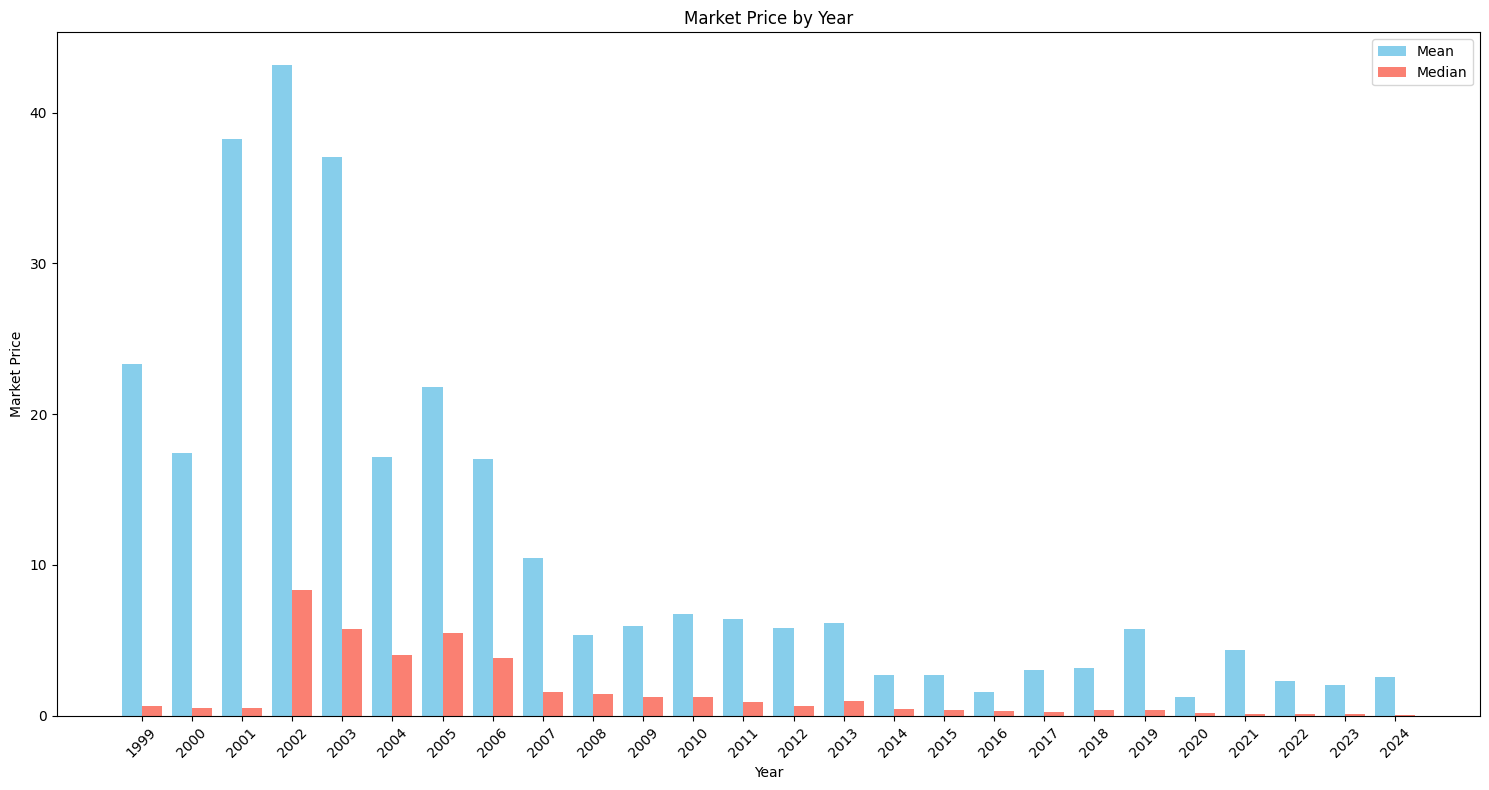

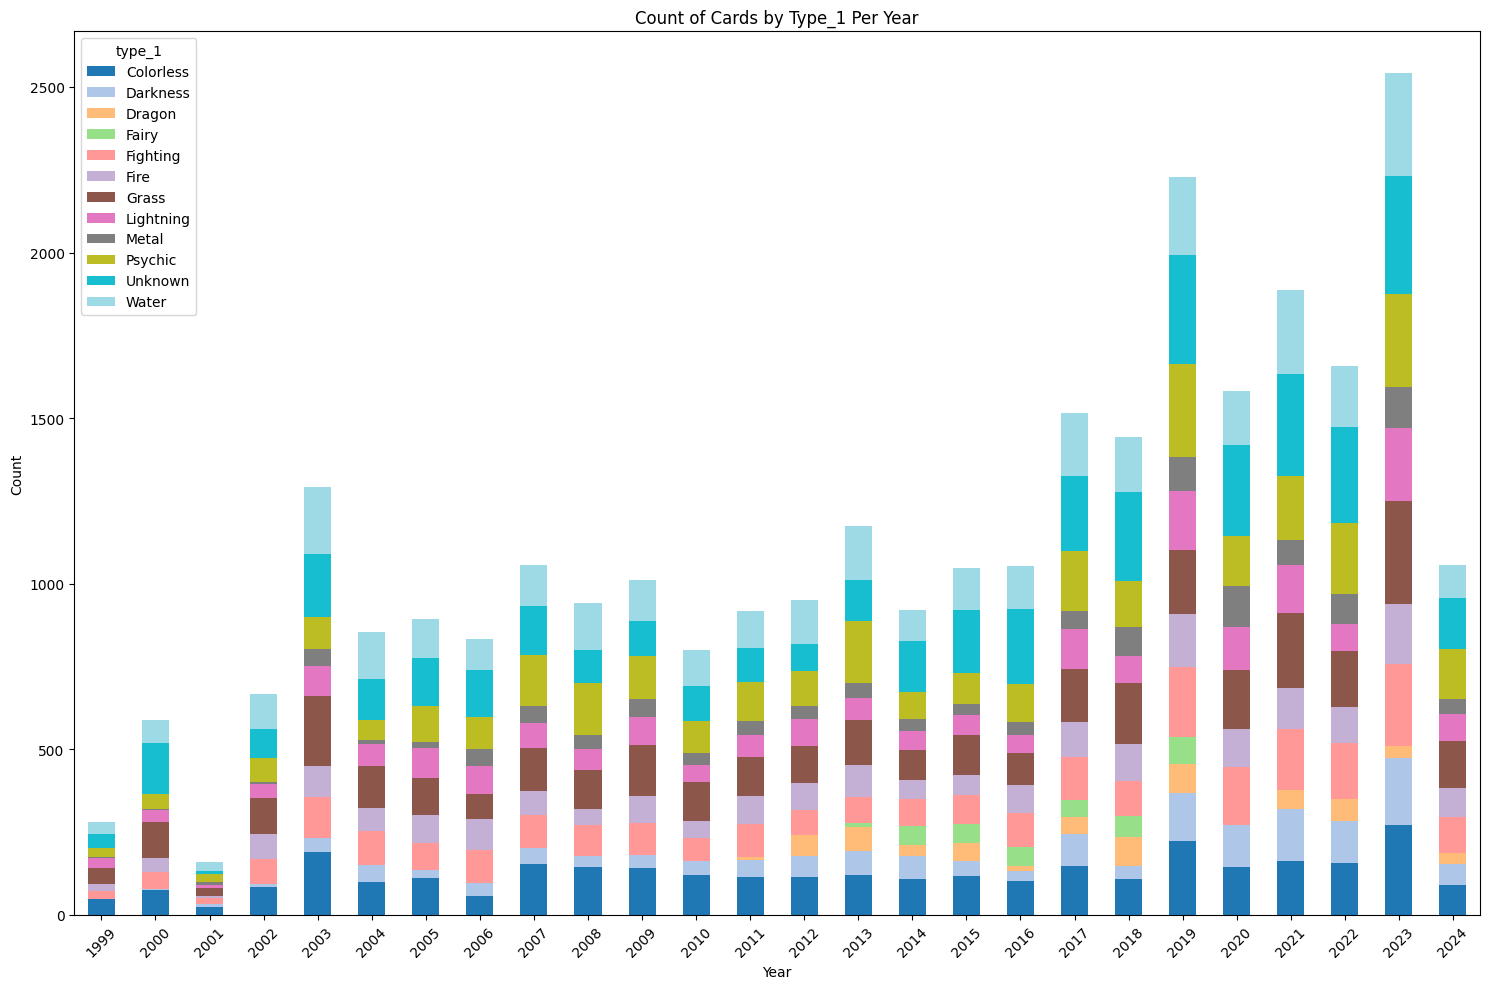

## Using Price Buckets

I chose to create 2 different price buckets based on the market price. I chose a 50 dollar cutoff primarily due to the sets that we have bought for my son. Most packs range from 3 to 6 dollars, there are a number of booster packs and larger sets that have extra cards in them. 
- While I looked at some price distributions and looked at the data, part of the cutoff was determined by my motivation for this project from the start. 
  - At what price point would we be motivated to actually try to sell a card? 
  - If we did ever try, what cost and effort would be involved in that?
    - While those questions are out of the scope of this project, they could be factored in to a more in depth analysis and what cutoff to choose. If the cost is $50 to actually grade and sell a card, then maybe we would want the cutoff to be much higher. 
- This analysis was truly exploratory in nature and trying to understand more about the factors that go into card value.

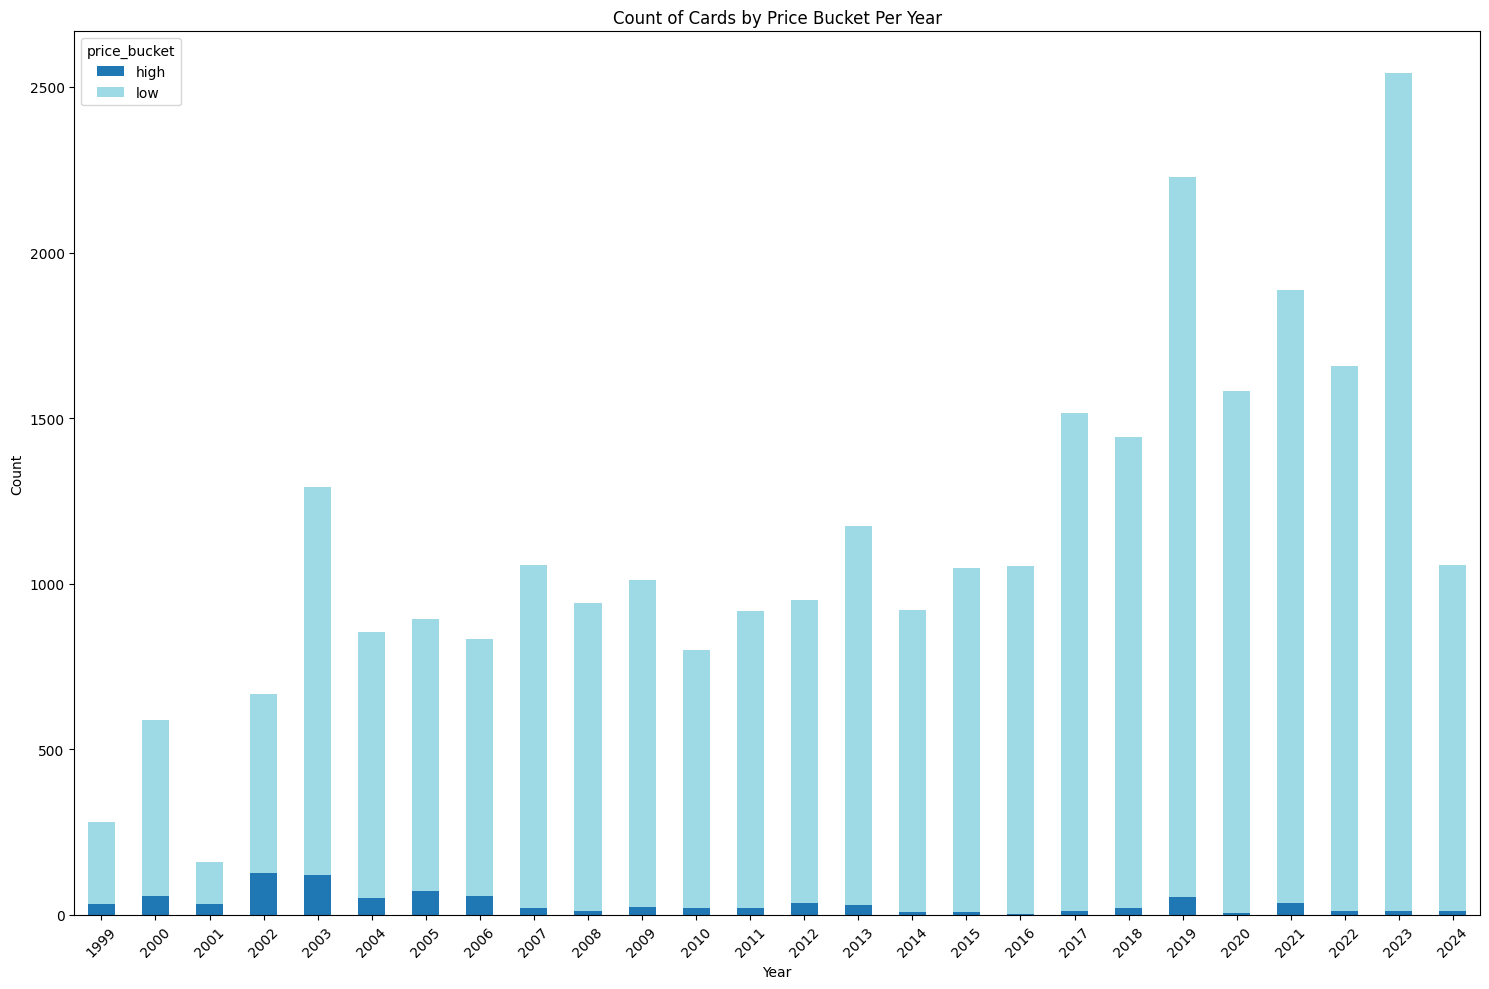

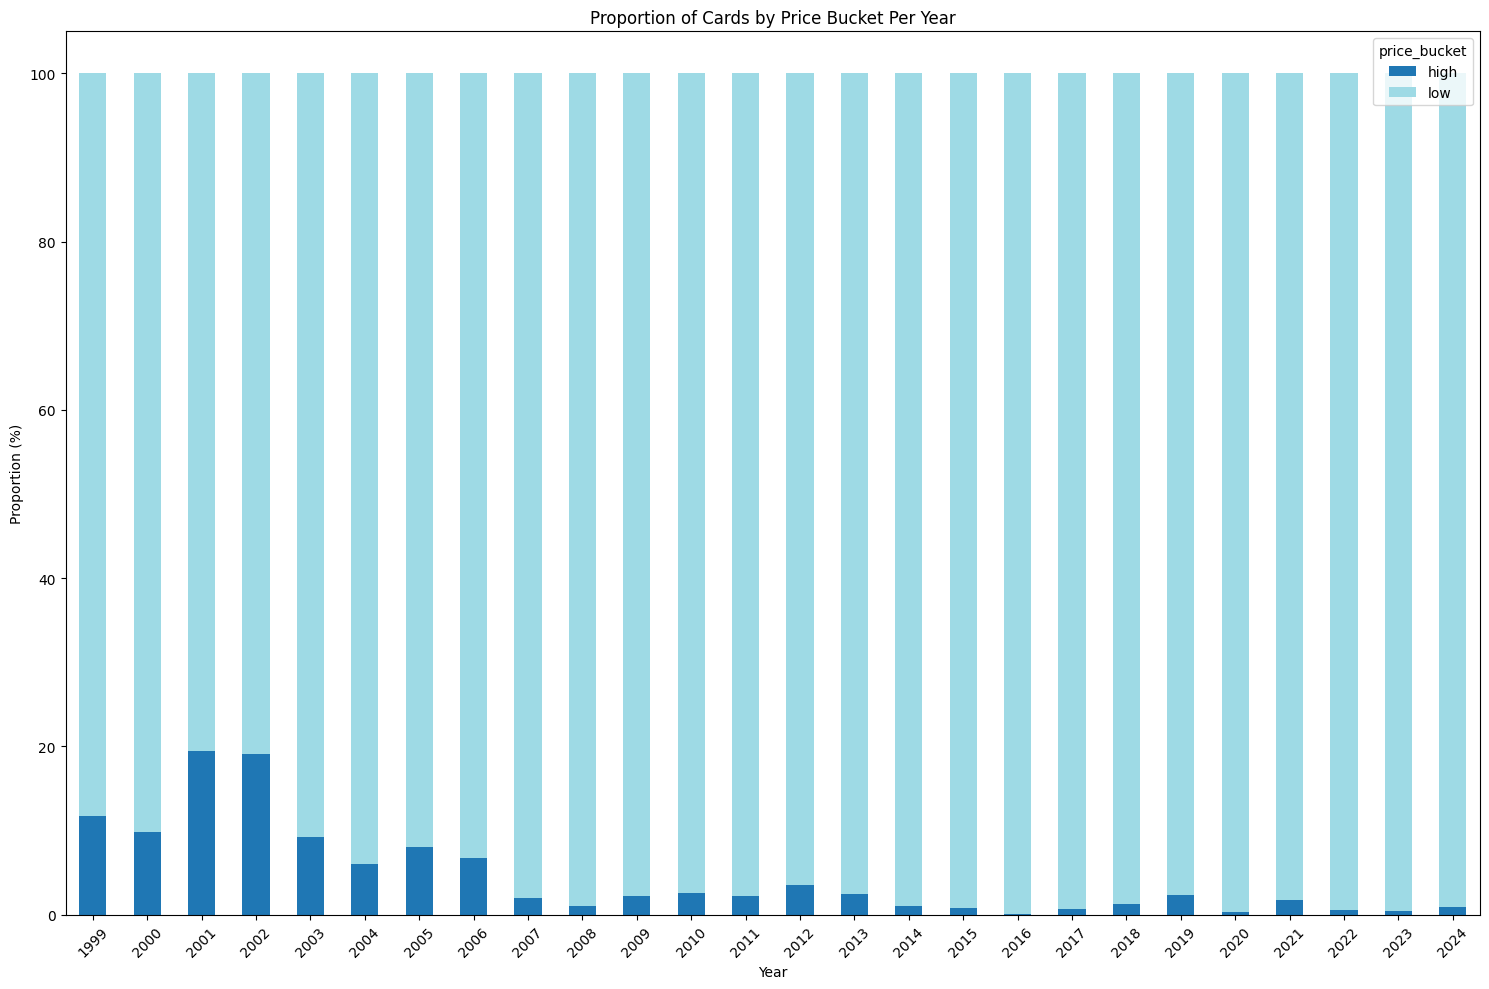

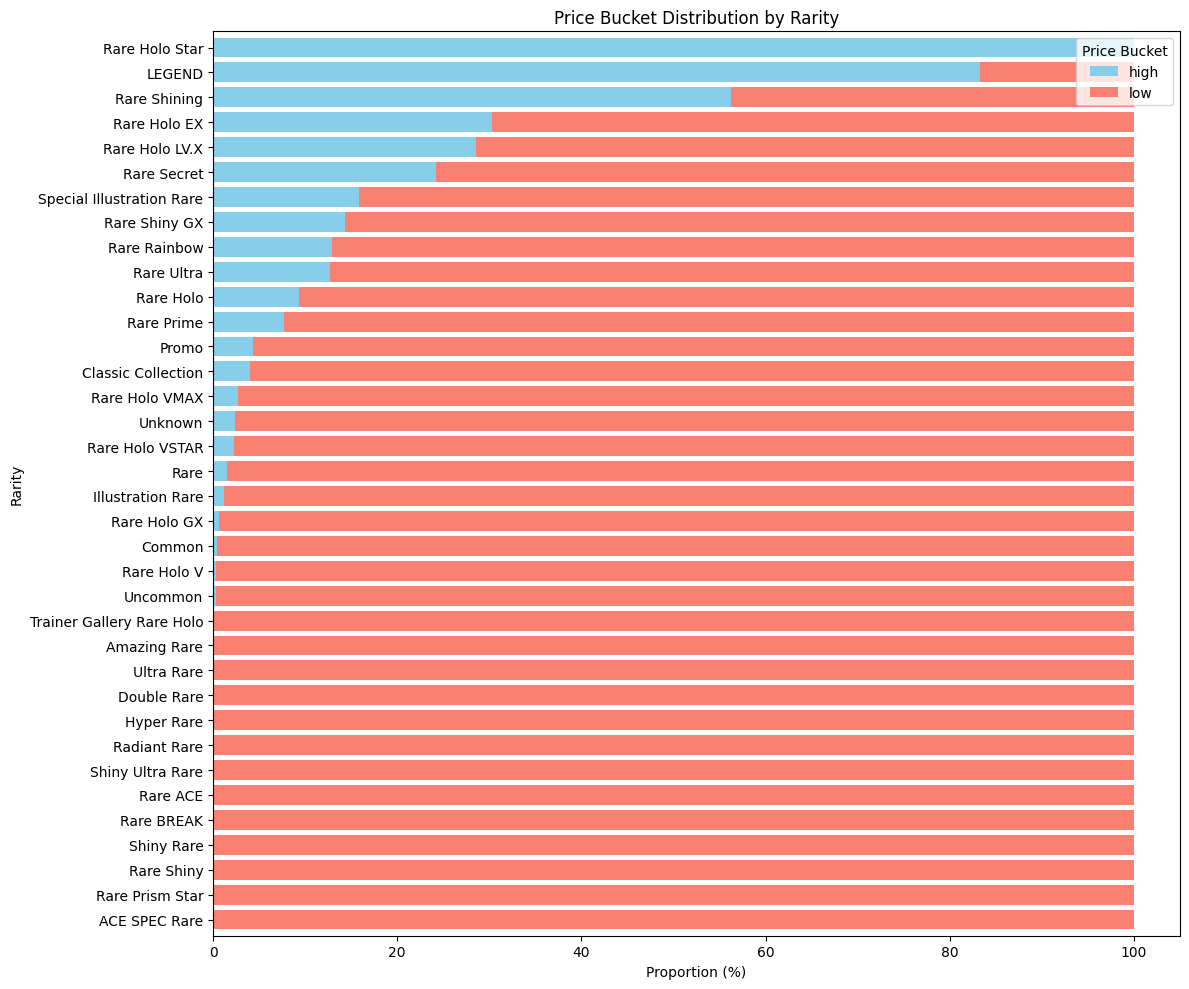

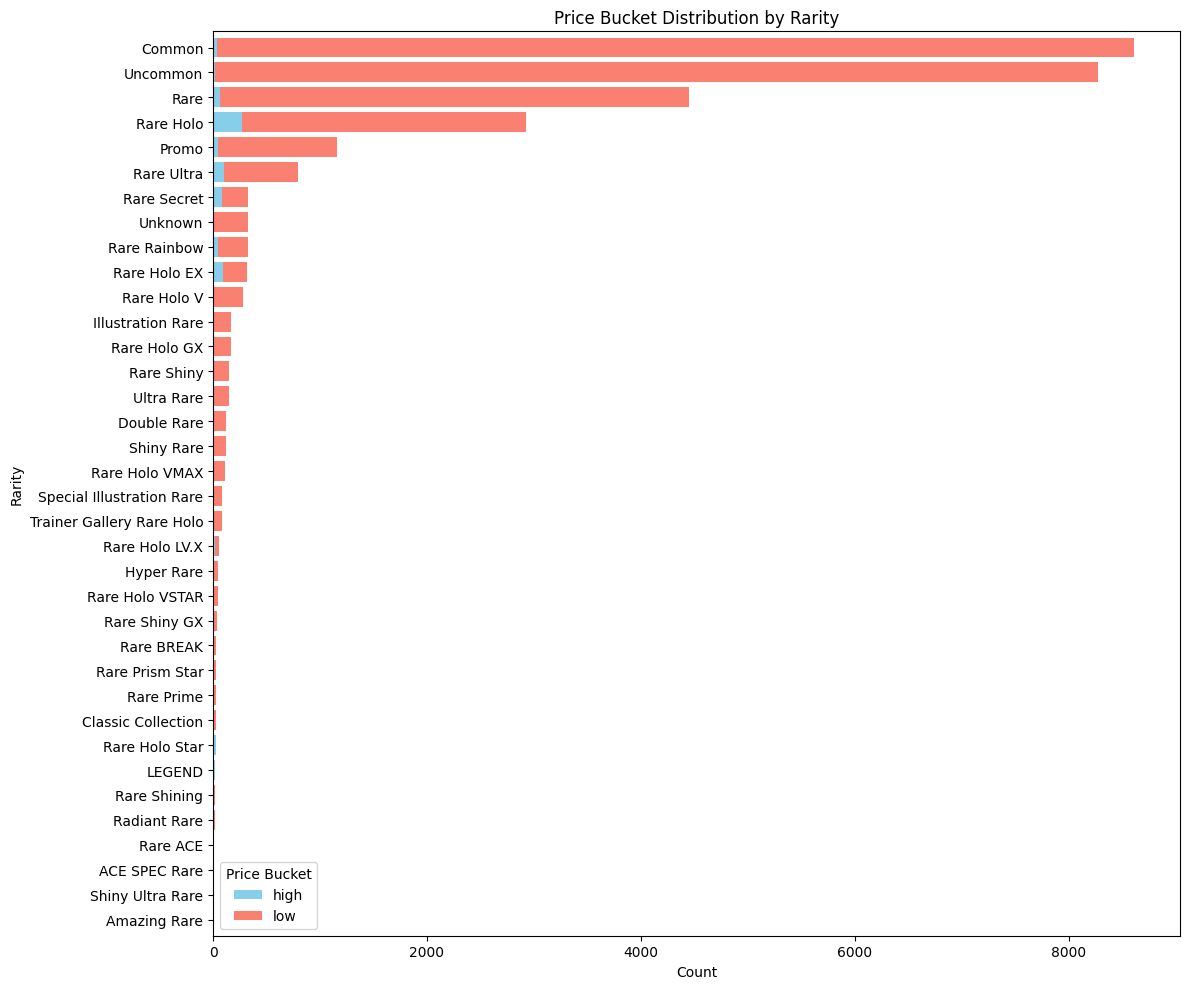

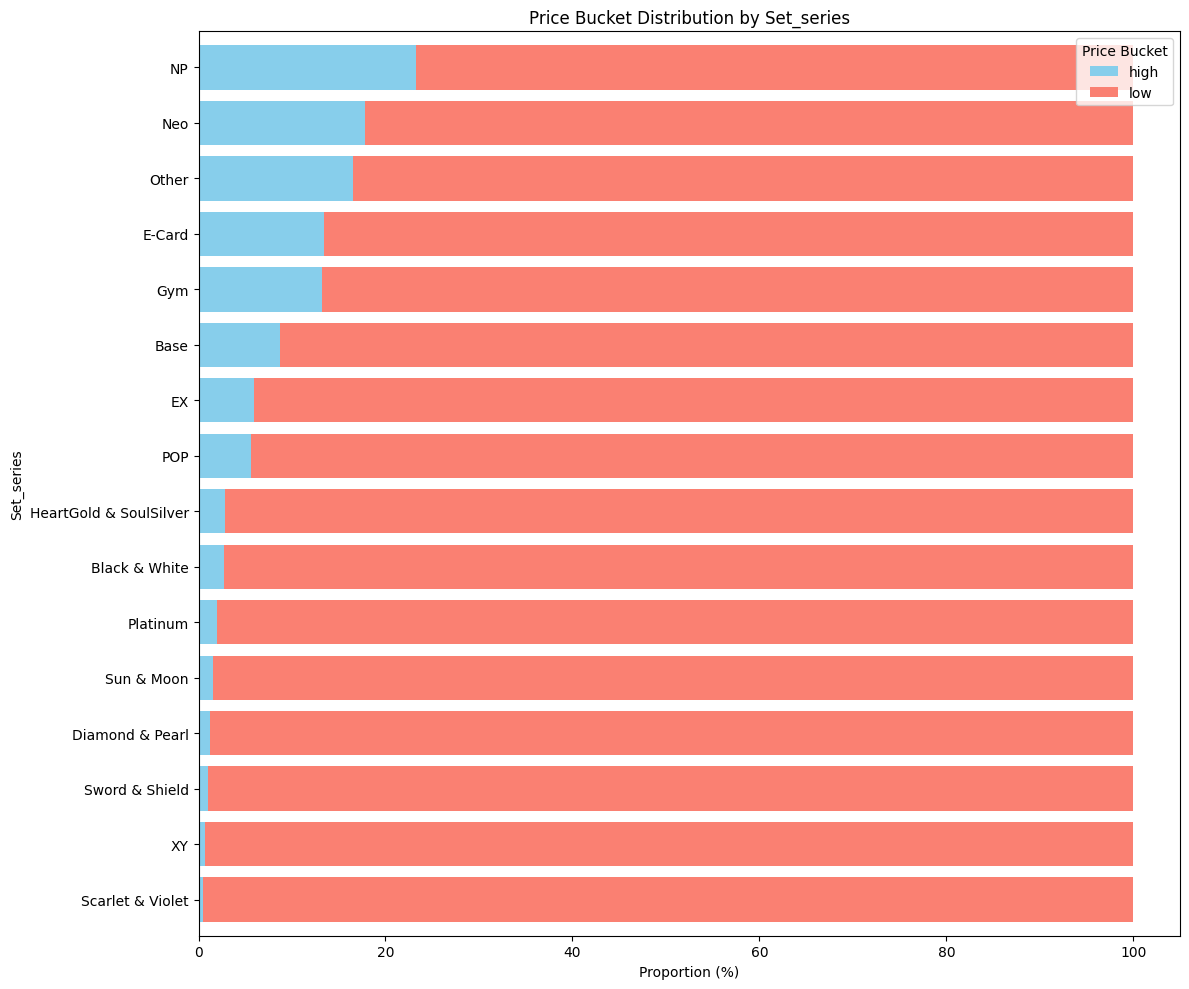

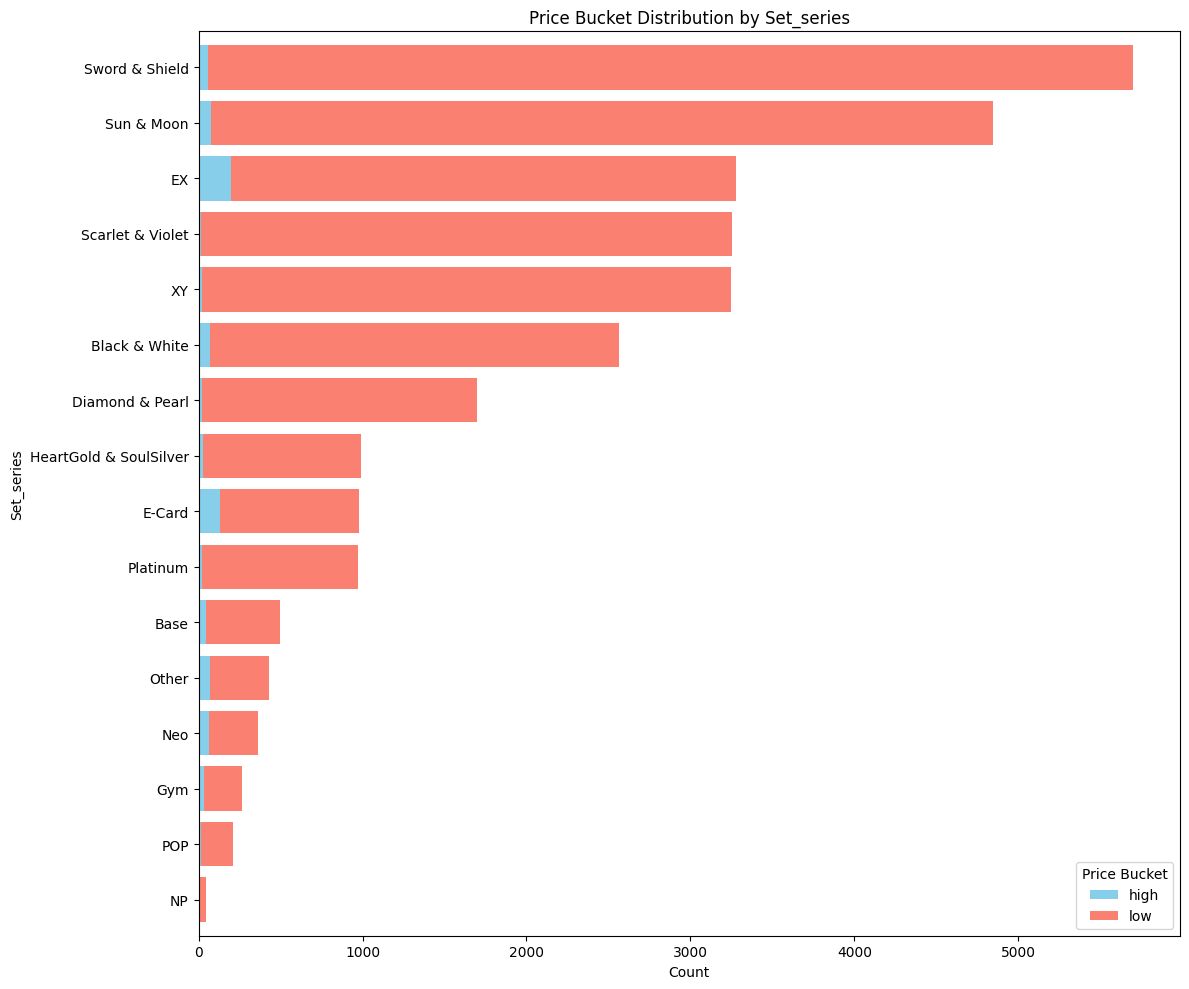

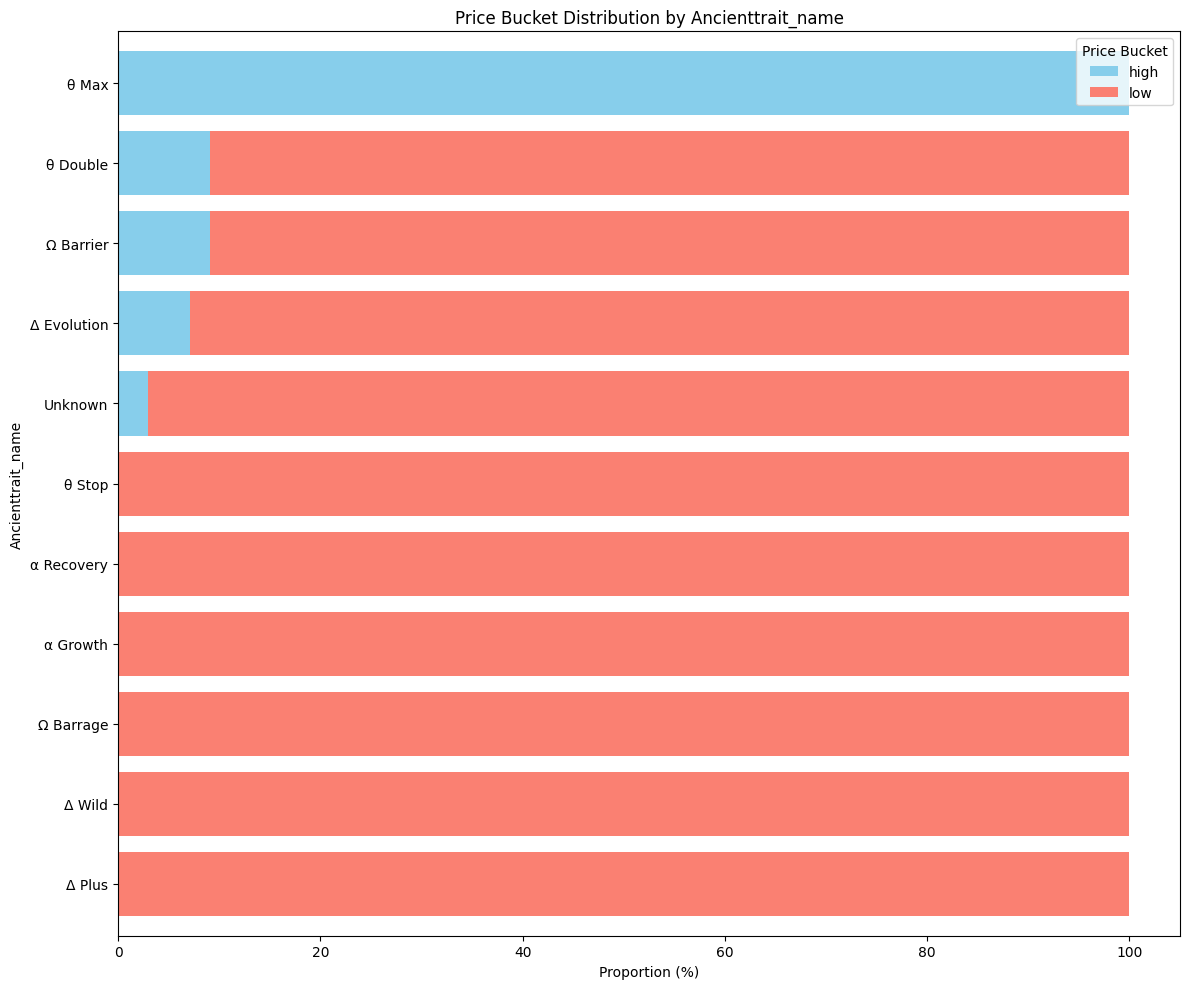

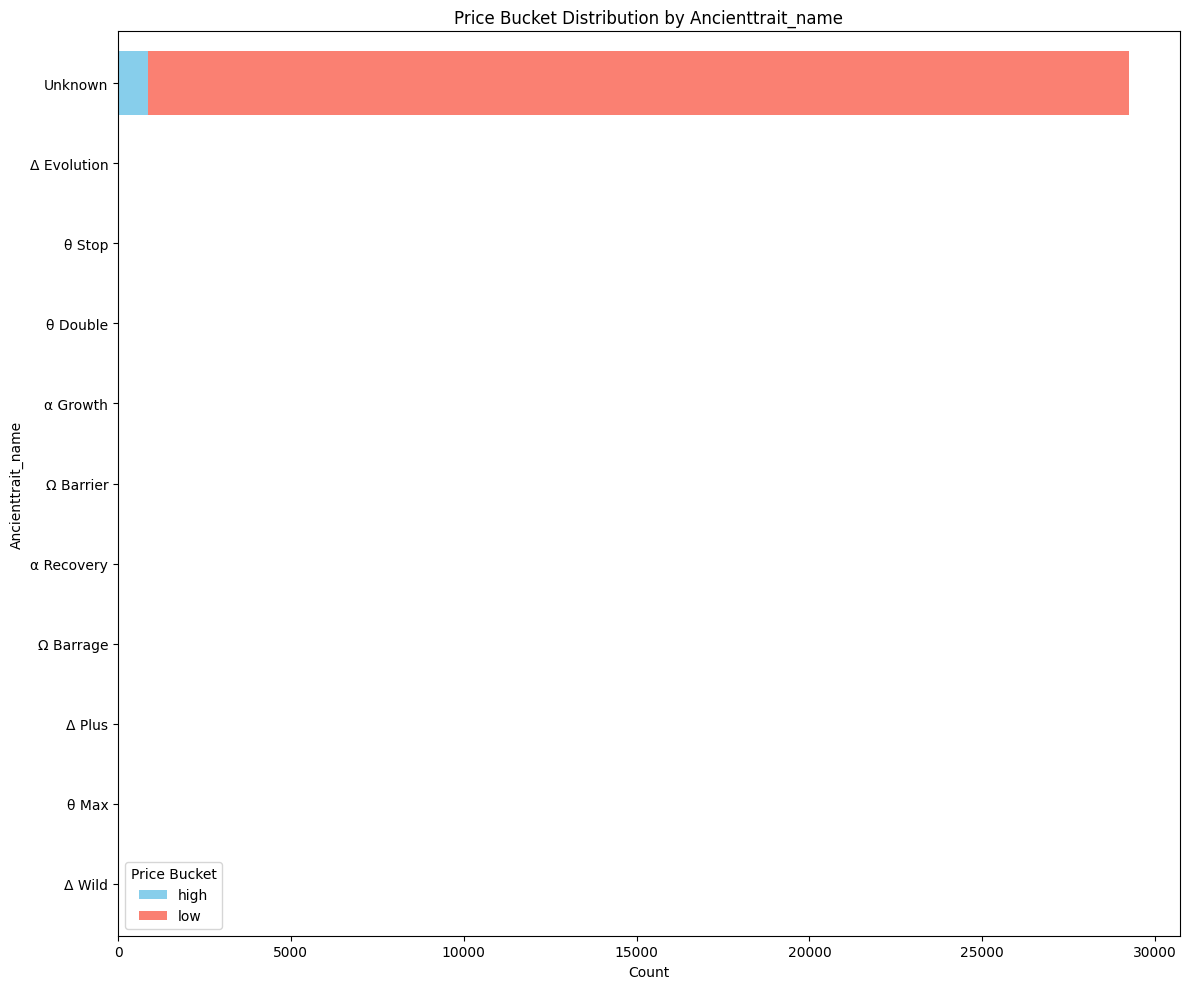

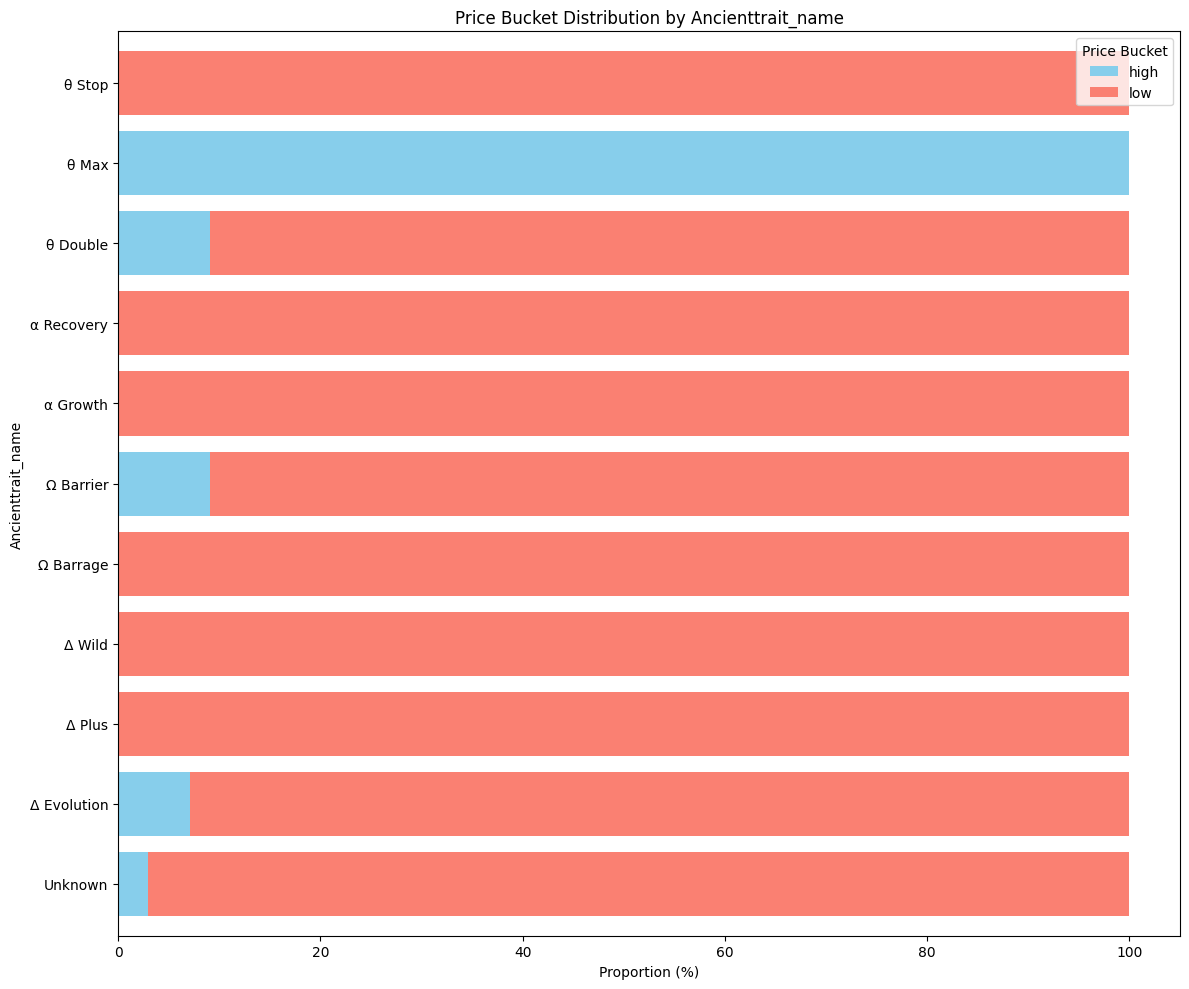

# Questions?

jupyter nbconvert presentation.ipynb --to slides --post serve --no-input --no-prompt